In [ ]:
in this project we will identfy if the hotel is good or based on reviews of customer. Ourgoal is to defind
What hotel qualities are listed in positive or negative comments?

In [ ]:
load packages

In [1]:
install.packages("tidytext")
install.packages("textdata")
install.packages("qdap")

library(textdata)
library(tidytext)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(qdap)


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidytext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samar\AppData\Local\Temp\RtmpM9Nx2e\downloaded_packages


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'textdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samar\AppData\Local\Temp\RtmpM9Nx2e\downloaded_packages


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'qdap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samar\AppData\Local\Temp\RtmpM9Nx2e\downloaded_packages


Warning message:
"package 'textdata' was built under R version 3.6.3"Warning message:
"package 'tidytext' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts -------------------

load data set. you can find the data in kaggle under the name

In [2]:
hotel_reviews<-read.csv("hotel _eviews.csv",header=TRUE)

In [ ]:
Lets see our data

In [3]:
head(hotel_reviews)

Property.Name,Review.Rating,Review.Title,Review.Text,Location.Of.The.Reviewer,Date.Of.Review
Apex London Wall Hotel,5,Ottima qualità prezzo,"Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da amici. | Personale molto gentile e disponibile, camere sufficientemente grandi ma soprattutto pulite e confortevoli con un letto matrimoniale grande e comodo, tv grande, impianto stereo Bose, . | Bagno grande con asciugacapelli, vasca da bagno, doccia, accappatoio, ciabatte, ecc. ma soprattutto pulito! | Ottima posizione sebbene sia nella zona finanziaria e quindi il fine settimana praticamente deserta ma per noi è stato forse un vantaggio per la tranquillità e visto che in pochi minuti si raggiungono zone molto vivaci. | In ogni caso muoversi non è un problema: la metro di Moorgate è a due passi così come la stazione della metro e dei treni Liverpool Street (treno con collegamento diretto all'aeroporto di Stansted). | Nel periodo in cui siamo stati noi stavano ristrutturando e quindi probabilmente oggi sarà ancora meglio, da tornare e da consigliare! | Abbiamo speso per 2 notti senza colazione (evitata visto il costo e le opinioni negative) 257Sterline.","Casale Monferrato, Italy",10/20/2012
Corinthia Hotel London,5,"By far, my best hotel in the world","I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every way. Communication with the hotel before staying was prompt, and very efficient. Checking in was a breeze. You go through the spectacular lobby with modern glass chandeliers and take the elevator to your room. My room, they gave me an upgrade to junior suite, was spectacular. We had a walk-in closet of the size where you could have put a small bed in there; it served us nicely for the seven day stay. The decor was very refined, and oh the bathroom! Carrera marble floor was heated throughout, rain shower was to die for! | Location, as it turned out, was as good as it can be. We were 5 minutes walk to Trafalgar Square, but it was very quiet. Right outside was Embankment tube stop. We would walk to theater area and to numerous restaurants, and many major sites, such as London Eye or Westminster Abbey were within walking distance. | We had buffet breakfast or room service every morning. It was pricy, but my rate included it. Couple of nights, we had glass of wine sitting in front of fire place in the lobby. I used the spa, which is included in the room rate, almost every night. After a windchill day of sightseeing, the steam sauna and jacuzzi would soften my weary muscles. | I have stayed in many 5 star hotels around the world, but this hotel tops it. I would return here in a heartbeat next time I am in London.","Savannah, Georgia",3/23/2016
The Savoy,5,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive at all! Very delicious cocktails and just generally all round, a very indulgent experience. | Well worth visiting only for that 'once in a lifetime' experience, though do make sure you are feeling 'flush' it doesn't come cheap!",London,7/30/2013
Rhodes Hotel,4,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington Express from Heathrow. We like the location clost to the partk and in walking distance of most locations. The room and bath were small compared to American Hotels but very clean. We enjoyed the free WIFI. The owners and the staff were very friendly and helpful with taxi's and resturant recomendations. We would stay there again.","Maui, Hawaii",6/2/2012
The Savoy,5,Perfection,Form the moment we arrived until we left we experienced absolute perfection in service excellance by every member of The Savoy staff. Famous for its personalise service and rich heritage the Savoy is truly won of the best hotels in the world to stay at. For eating and dining woud highly recommend Kaspers restaurant. For ourselves we 

In [4]:
str(hotel_reviews)

'data.frame':	972 obs. of  6 variables:
 $ Property.Name           : Factor w/ 19 levels "45 Park Lane - Dorchester Collection",..: 3 5 18 13 18 3 11 11 13 18 ...
 $ Review.Rating           : int  5 5 5 4 5 5 5 5 5 5 ...
 $ Review.Title            : Factor w/ 926 levels "\"A big warm hug...\"",..: 630 198 358 600 674 392 922 496 631 171 ...
 $ Review.Text             : Factor w/ 972 levels "<U+041E><U+0442><U+0435><U+043B><U+044C> <U+0431><U+0435><U+0437><U+0443><U+0441><U+043B><U+043E><U+0432><U+043"| __truncated__,..: 598 297 36 14 179 692 54 942 551 720 ...
 $ Location.Of.The.Reviewer: Factor w/ 572 levels ".Dublin","<U+4E09><U+91CD><U+770C><U+3044><U+306A><U+3079><U+5E02>",..: 100 454 291 315 295 299 482 293 82 328 ...
 $ Date.Of.Review          : Factor w/ 831 levels "1/1/2016","1/10/2012",..: 96 401 690 590 193 103 242 425 358 519 ...


In [7]:
dim(hotel_reviews)

[1] 972   6

polarity

In [8]:
hotel_reviews_polarity <-polarity(hotel_reviews$Review.Text)


Warning message in polarity(hotel_reviews$Review.Text):
"
  Some rows contain double punctuation.  Suggested use of `sentSplit` function."

In [9]:
str(hotel_reviews_polarity)

List of 2
 $ all  :'data.frame':	972 obs. of  6 variables:
  ..$ all      : chr [1:972] "all" "all" "all" "all" ...
  ..$ wc       : int [1:972] 163 260 52 73 62 44 101 60 61 81 ...
  ..$ polarity : num [1:972] 0 0.943 1.276 1.194 1.067 ...
  ..$ pos.words:List of 972
  .. ..$ : chr "fine"
  .. ..$ : chr [1:14] "pleasure" "perfect" "prompt" "efficient" ...
  .. ..$ : chr [1:6] "lovely" "wonderful" "delicious" "indulgent" ...
  .. ..$ : chr [1:7] "great" "like" "clean" "enjoyed" ...
  .. ..$ : chr [1:6] "perfection" "famous" "rich" "won" ...
  .. ..$ : chr [1:5] "helpful" "great" "lovely" "comfortable" ...
  .. ..$ : chr [1:10] "welcome" "friendly" "smile" "helping" ...
  .. ..$ : chr [1:12] "incredibly" "cool" "delicious" "interesting" ...
  .. ..$ : chr "-"
  .. ..$ : chr [1:5] "top" "astonishing" "awesome" "work" ...
  .. ..$ : chr [1:19] "great" "great" "best" "best" ...
  .. ..$ : chr [1:4] "clean" "like" "cheaper" "better"
  .. ..$ : chr [1:4] "nice" "improvement" "incredibly" "gr

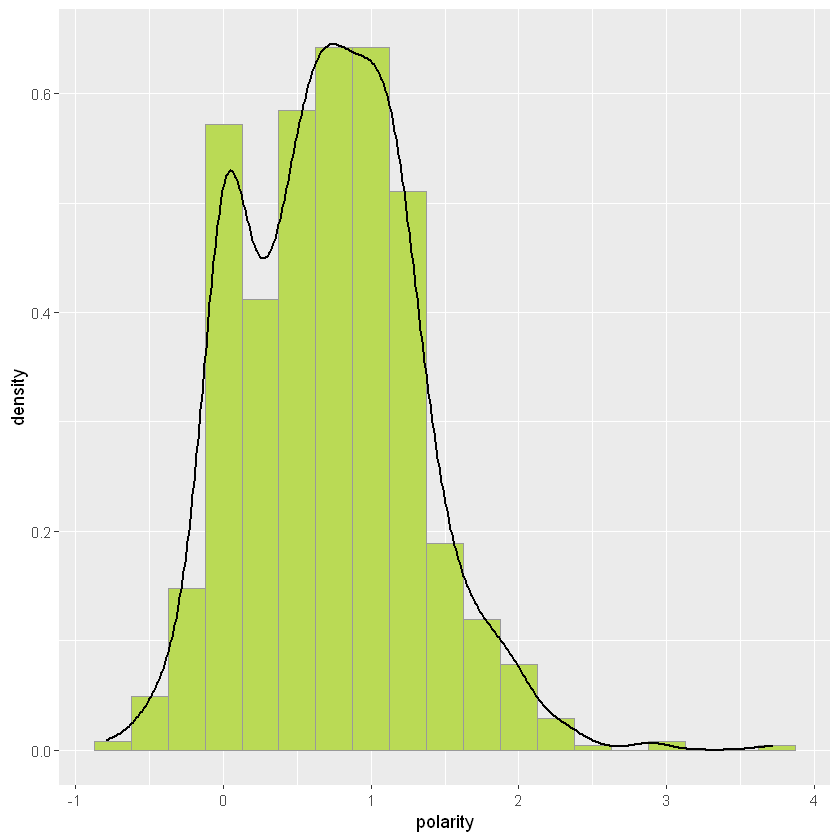

In [10]:
ggplot(hotel_reviews_polarity$all, aes(x = polarity, y = ..density..)) +
  geom_histogram(binwidth = 0.25, fill = "#bada55", colour = "grey60") +
  geom_density(size = 0.75) 

In [ ]:
It seems from the plot that people shows positivity throwth the hotels

In [ ]:
Lets see the positive comments

In [12]:
positive_comments <- hotel_reviews %>%
  # Add polarity column
  mutate(polarity = hotel_reviews_polarity$all$polarity) %>%
  # Filter for positive polarity
  filter(polarity > 0) %>%
  # Extract comments column
  pull(Review.Text) %>% 
  # Paste and collapse
  paste(collapse = " ")

In [ ]:
negative comments

In [ ]:
Negative_comments <- hotel_reviews %>%
  # Add polarity column
  mutate(polarity = hotel_reviews_polarity$all$polarity) %>%
  # Filter for positive polarity
  filter(polarity < 0) %>%
  # Extract comments column
  pull(Review.Text) %>% 
  # Paste and collapse
  paste(collapse = " ")

In [ ]:
Let remove the stop words

In [37]:
hotel_reviews$Review.Text<-as.character(hotel_reviews$Review.Text)


In [51]:
tidy_hotel_reviews <- hotel_reviews %>% 
  unnest_tokens(word, Review.Text)
tidy_hotel_reviews <- tidy_hotel_reviews %>% 
  group_by(Review.Rating) %>% 
  mutate(original_word_order = seq_along(word))
# Load stopwords
data("stop_words")

# Perform anti-join
tidy_hotel_reviews_without_stopwords <- tidy_hotel_reviews %>% 
  anti_join(stop_words)


Joining, by = "word"


In [54]:
# Get the correct lexicon
bing <- get_sentiments("bing")

# Calculate polarity for each review
pos_neg <- tidy_hotel_reviews %>% 
  inner_join(bing) %>%
  count(sentiment) %>%
  spread(sentiment, n, fill = 0) %>% 
  mutate(polarity = positive - negative)

# Check outcome
summary(pos_neg)
  


Joining, by = "word"


 Review.Rating    negative      positive       polarity   
 Min.   :1     Min.   : 67   Min.   :  52   Min.   : -15  
 1st Qu.:2     1st Qu.:162   1st Qu.: 267   1st Qu.: 105  
 Median :3     Median :176   Median : 346   Median : 170  
 Mean   :3     Mean   :338   Mean   :1697   Mean   :1359  
 3rd Qu.:4     3rd Qu.:408   3rd Qu.:1594   3rd Qu.:1186  
 Max.   :5     Max.   :877   Max.   :6225   Max.   :5348  

In [55]:
pos_neg

Review.Rating,negative,positive,polarity
1,67,52,-15
2,162,267,105
3,176,346,170
4,408,1594,1186
5,877,6225,5348


Installing package into 'C:/Users/Samar/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samar\AppData\Local\Temp\RtmpM9Nx2e\downloaded_packages


Warning message:
"package 'ggthemes' was built under R version 3.6.3"Joining, by = "Review.Rating"
`geom_smooth()` using formula 'y ~ x'


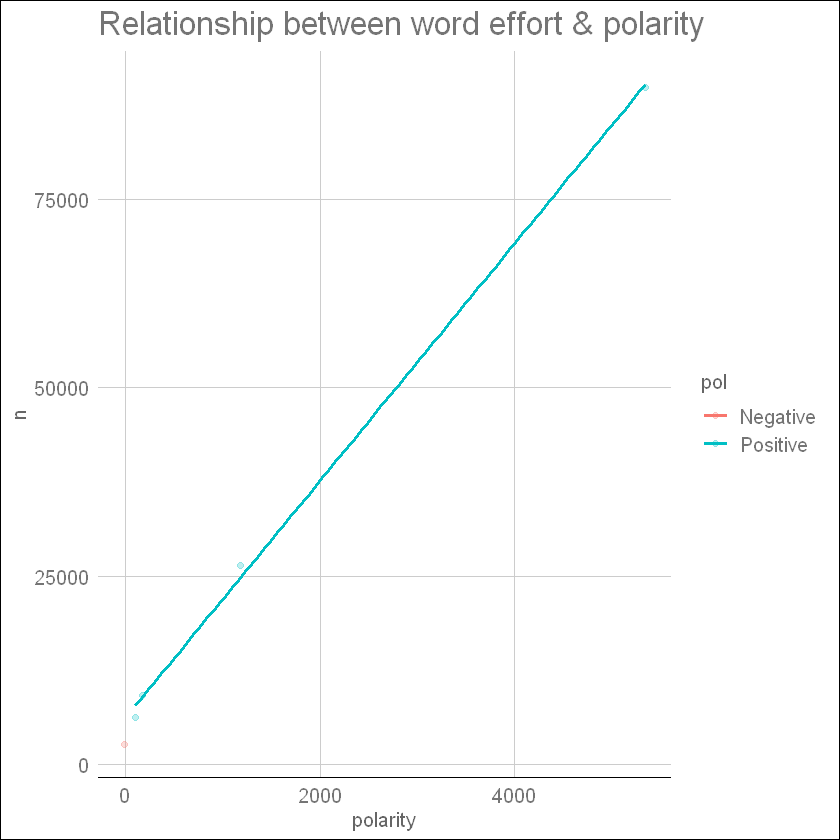

In [57]:
# From previous step
install.packages("ggthemes")
library(ggthemes)
pos_neg_pol <- tidy_hotel_reviews %>% 
  count(Review.Rating) %>% 
  inner_join(pos_neg) %>% 
  mutate(pol = ifelse(polarity >= 0, "Positive", "Negative"))
  
# Plot n vs. polarity, colored by pol
ggplot(pos_neg_pol, aes(polarity, n, color = pol)) + 
  # Add point layer
  geom_point(alpha = 0.25) +
  # Add smooth layer
  geom_smooth(method = "lm", se = FALSE) +
  theme_gdocs() +
  ggtitle("Relationship between word effort & polarity")

In [41]:
names(tidy_hotel_reviews)

[1] "Property.Name"            "Review.Rating"           
[3] "Review.Title"             "Location.Of.The.Reviewer"
[5] "Date.Of.Review"           "word"

In [ ]:
Remooving stop word

In [30]:
bing <- get_sentiments("bing")

# Calculate polarity for each review
pos_neg <- hotel_reviews %>% 
  inner_join(bing) %>%
  count(sentiment) %>%
  spread(sentiment, n, fill = 0) %>% 
  mutate(polarity = positive - negative)

# Check outcome
summary(pos_neg)

ERROR: Error: `by` must be supplied when `x` and `y` have no common variables.
i use by = character()` to perform a cross-join.
